# Adidas Sales

## Table of Contents

#### Importing libraries and data and renaming columns
#### The elbow technique
#### k-means clustering

### Importing libraries and data and renaming columns

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [31]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [32]:
#Create path
path = r'/Users/rusamijan/04-2023 Adidas Sales Analysis'

In [33]:
#Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ad_cleaned.pkl'))

In [34]:
df.shape

(9648, 13)

In [35]:
df.head()

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732       1/1/20  Northeast  New York  New York   
1  Foot Locker      1185732       1/2/20  Northeast  New York  New York   
2  Foot Locker      1185732       1/3/20  Northeast  New York  New York   
3  Foot Locker      1185732       1/4/20  Northeast  New York  New York   
4  Foot Locker      1185732       1/5/20  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0      1200.0     600000.0   
1    Men's Athletic Footwear            50.0      1000.0     500000.0   
2    Women's Street Footwear            40.0      1000.0     400000.0   
3  Women's Athletic Footwear            45.0       850.0     382500.0   
4              Men's Apparel            60.0       900.0     540000.0   

   Operating Profit Operating Margin Sales Method  
0          300000.0              50%     In-store  
1          150000.0              30%     In-store  
2          140000.0              35%     In-store  
3          133875.0              35%     In-store  
4          162000.0              30%     In-store

In [36]:
# Removing all categorical variables
df1=df.drop(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City', 'Product', 'Operating Margin','Sales Method'], axis = 1, inplace = True)

In [37]:
df.head()

Price per Unit  Units Sold  Total Sales  Operating Profit
0            50.0      1200.0     600000.0          300000.0
1            50.0      1000.0     500000.0          150000.0
2            40.0      1000.0     400000.0          140000.0
3            45.0       850.0     382500.0          133875.0
4            60.0       900.0     540000.0          162000.0

In [38]:
df.shape

(9648, 4)

### The elbow technique

In [39]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [40]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-222624751169467.38,
 -58094556256654.984,
 -25608350356032.3,
 -15438012889624.371,
 -10353620803259.992,
 -7783344987771.783,
 -6071783667101.471,
 -5130825186573.666,
 -4464413545969.502]

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [42]:
#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### k-means clustering

In [43]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,) 

In [44]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [45]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

In [46]:
df.head()

Price per Unit  Units Sold  Total Sales  Operating Profit  clusters
0            50.0      1200.0     600000.0          300000.0         1
1            50.0      1000.0     500000.0          150000.0         1
2            40.0      1000.0     400000.0          140000.0         1
3            45.0       850.0     382500.0          133875.0         1
4            60.0       900.0     540000.0          162000.0         1

In [47]:
#export the clustering table for using in Tableau
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'adidas_4clustering.csv'))

In [48]:
# Verify if the clusters we correctly assigned with a general view
df['clusters'].value_counts()

0    6744
2    2058
1     846
Name: clusters, dtype: int64

In [49]:
df.columns

Index(['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'clusters'],
      dtype='object')

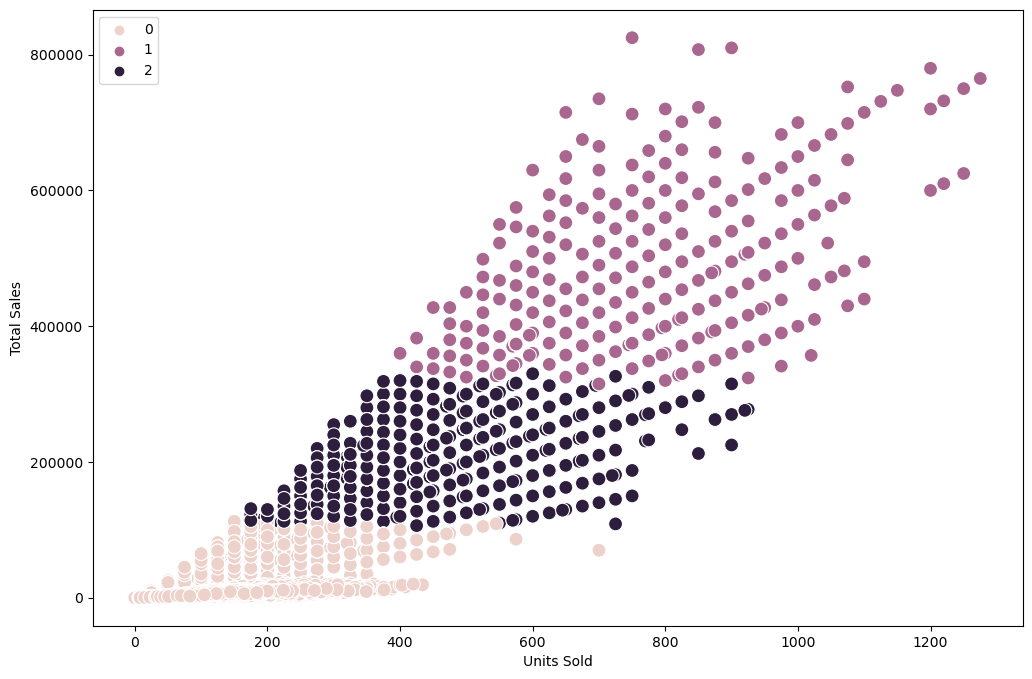

In [50]:
# Plot the clusters for the "Units Sold" and "Total Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Units Sold'], y=df['Total Sales'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Units Sold') # Label x-axis.
plt.ylabel('Total Sales') # Label y-axis.
plt.show()

In [58]:
# Plot the clusters for the "Operating Profit" and "Units Sold" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Total Sales'], y = df['Operating Profit'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Total Sales')
plt.ylabel('Operating Profit')
plt.show()

In [51]:
# Plot the clusters for the "Operating Profit" and "Units Sold" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Units Sold'], y = df['Operating Profit'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Units Sold')
plt.ylabel('Operating Profit')
plt.show()

In [52]:
# Plot the clusters for the "Price per Unit" and "Total Sales" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Price per Unit'], y = df['Total Sales'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Price per Unit')
plt.ylabel('Total Sales')
plt.show()

### Observations

#### For the most part, the purple (cluster 1) cluster has performed the best in all three plots.

#### The plot 'Units Sold vs Total Sales' has divided clusters quite well showing that with higher 'Units Sold', the'  'Total Sales' Increases as well.

#### The plot 'Operating Profit vs Unit Sold' has divided clusters well just above 450 units sold has some overlaps between dark purple and medium purple. Still...with higher unit sold, the operating profit increase as well

#### The plot 'Price per Unit vs Total Sales' shows that dark purple cluster is not represented in the price above 85 USD.

### Grouping

In [53]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [54]:
df.groupby('cluster').agg({'Total Sales':['mean', 'median'], 
                         'Price per Unit':['mean', 'median'], 
                         'Units Sold':['mean', 'median'],
                          'Operating Profit':['mean', 'median']})

Total Sales           Price per Unit         Units Sold         \
                      mean    median           mean median        mean median   
cluster                                                                         
dark purple  202416.059281  195000.0      48.542274   50.0  432.896016  425.0   
pink          15173.765569    5839.0      42.038849   41.0  143.091785  133.0   
purple       450352.245863  425000.0      62.458629   60.0  736.347518  725.0   

            Operating Profit            
                        mean    median  
cluster                                 
dark purple     73392.640428   70000.0  
pink             5896.094751    2657.5  
purple         167056.507092  157500.0

In [55]:
df2 = df.groupby('cluster').agg({'Total Sales':['mean', 'median'], 
                         'Price per Unit':['mean', 'median'], 
                         'Units Sold':['mean', 'median'],
                          'Operating Profit':['mean', 'median']})

#### The k-means clustering model has showed some interesting insights. However, it would be great to include the categorical variables in the analysis. 

In [56]:
#export the clustering result for using in Tableau
df2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'adidas_4clustering_result.csv'))